# 170671 Shivam Pandey
# CE678A Lab2

## 3.1 Water storage change

### Task1&2: Download and Read data from water_storage_change_time_series_IITK.csv

In [6]:
pkg load dataframe;
% load dataframe from the csv file
df = dataframe("water_storage_change_time_series_IITK.csv");

In [7]:
% convert date-time into the seconds since the epoch
% strptime converts the time to structure https://octave.sourceforge.io/octave/function/mktime.html
% mktime converts to the seconds since epoch https://octave.sourceforge.io/octave/function/mktime.html 
format long;
date_time = cellfun (@(x) mktime (strptime(x, "%Y-%m-%e %T")),
             cellstr (df.array(:,1)));
% date and time structure
date_time_struct = cellfun (@(x) strptime(x, "%Y-%m-%e %T"),
             cellstr (df.array(:,1)));

% get the water level data given in the csv
data = str2num(df.array(:, 2)); 

In [3]:
% function to split year month and date 
function d = split_ymd(df_array)
    [data_point, dim] = size(df_array);
    data_mat = zeros([data_point, 6]);
    for i = 1:data_point
        split_dat = strsplit(df_array(i, :), {" ", "-", ":"});
        for j = 1:6
            data_mat(i, j) = str2num(char(split_dat(j)));
        endfor
    endfor
    d = data_mat;
    return;
endfunction

% split date_time in year mpnth and date
date_time_split_YMD = split_ymd(df.array(:, 1))

date_time_split_YMD =

   2002      4      1      0      0      0
   2002      5      1      0      0      0
   2002      8      1      0      0      0
   2002      9      1      0      0      0
   2002     10      1      0      0      0
   2002     11      1      0      0      0
   2002     12      1      0      0      0
   2003      1      1      0      0      0
   2003      2      1      0      0      0
   2003      3      1      0      0      0
   2003      4      1      0      0      0
   2003      5      1      0      0      0
   2003      7      1      0      0      0
   2003      8      1      0      0      0
   2003      9      1      0      0      0
   2003     10      1      0      0      0
   2003     11      1      0      0      0
   2003     12      1      0      0      0
   2004      1      1      0      0      0
   2004      2      1      0      0      0
   2004      3      1      0      0      0
   2004      4      1      0      0      0
   2004      5      1      0   

### Task3: Compute the mean of the given data set.

In [8]:
mean_overall_data = mean(data);
disp("mean of the overall dataset-set is :- "), disp(mean_overall_data);

mean of the overall dataset-set is :- 
-2.067999583850932


### Task4:- Find anomalies of the time-series by removing the seasonal mean values for each data sets. Seasonal mean is the average of each calendar month over multiple years. 
For example, if you want to know what is the average temperature in January, then you take all the January values in your time-series
and take an average of them.

In [9]:
% get complete data anolmay
complete_data_anomaly = data-mean_overall_data;
disp("overall_data_anomaly:- "), disp(complete_data_anomaly);

% get sesional anomlay 
% each cell contains mean, anomaly, date_time_index_mask
anomalies_list = cell(12, 3);
for i = 1:12
    anomalies_list(i, 3) = (date_time_split_YMD(:, 2) == i);
    monthly_data = data(date_time_split_YMD(:, 2) == i);
    mean_monthly_data = mean(monthly_data);
    anomalies_list(i, 1) = mean_monthly_data;
    anomalies = monthly_data - mean_monthly_data;
    anomalies_list(i, 2) = anomalies;
    disp("anomalies for month number "), disp(i), disp(anomalies);
endfor

overall_data_anomaly:- 
   6.762995838509316e-01
  -4.746600416149069e+00
   1.575339958385093e+01
   2.280199958385093e+01
   1.835079958385093e+01
   1.393689958385093e+01
   4.444199583850931e+00
   4.688799583850932e+00
   3.480499583850932e+00
  -9.267004161490684e-01
  -8.718600416149069e+00
  -1.300600041614907e+01
   2.203779583850932e+00
   2.117219958385093e+01
   3.746329958385093e+01
   3.168929958385093e+01
   2.132179958385093e+01
   1.438669958385093e+01
   1.274129958385093e+01
   8.980399583850932e+00
   3.836799583850931e+00
  -3.400500416149068e+00
  -7.887400416149068e+00
  -5.388200416149068e+00
   8.858699583850932e+00
   2.026579958385093e+01
   2.421629958385093e+01
   2.001419958385093e+01
   1.831599958385093e+01
   7.939799583850932e+00
   9.072399583850931e+00
   6.794899583850931e+00
   6.382995838509316e-01
  -4.963000416149068e+00
  -7.704400416149068e+00
  -1.184920041614907e+01
   1.000919958385093e+01
   1.860889958385093e+01
   2.493069958385093e+01
 

### Task5:- Plot time series of the anomaly values as a subplot to the first time-series. Compare the amplitudes.

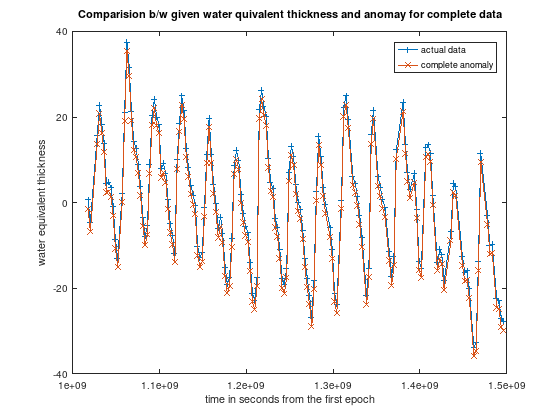

In [10]:
plot(date_time, complete_data_anomaly, "marker", "+", date_time, data, "marker", "x");
legend("actual data", "complete anomaly");
title ("Comparision b/w given water quivalent thickness and anomay for complete data");
xlabel("time in seconds from the first epoch");
ylabel("water equivalent thickness");

In [ ]:
% combining seasonal anomalies data
all_anom = [];
all_dt = [];
for i = 1:12
    all_anom = [all_anom; cell2mat(anomalies_list(i, 2))];
    all_dt = [all_dt; date_time(cell2mat(anomalies_list(i, 3)))];
endfor

% sort them to align in time frame
[~, idx] = sort(all_dt, "ascend");
all_dt = all_dt(idx);
all_anom = all_anom(idx);

% plot the data with complete data anomaly and seasonal anomaly
plot(date_time, complete_data_anomaly, "marker", "+", date_time, data, "marker", "x", all_dt, all_anom, "marker", "^", "color", "green");
legend("actual data", "complete anomaly", "seasonal anomalies");
title ("Comparision b/w given water quivalent thickness and anomay for complete data");
xlabel("time in seconds from the first epoch");
ylabel("water equivalent thickness");

#### Seasonal variations is given here has lesser variation from the seasonal mean than that of compared with the given variation for the complete all the data points i.e all the season, all the  years.

### Task6:- Compute mean, median, mode, standard deviation and variance for both the time-series of water storage and the anomalies. Also, plot their histograms. Compare the values and the histogram and provide a brief description.

In [ ]:
% for actual data 

% mean 
data_mean = mean(data);
disp("mean of the data:- "), disp(data_mean);

% median
data_median = median(data);
disp("median of the data:- "), disp(data_mdian);

% mode
data_mode = mode(data);
disp("mode of the data:- "), disp(data_mode);

% std
data_std = std(data);
disp("standard deviation of the data:- "), disp(data_std);

hist(data);
legend("actual data");
title ("distribution of water equivalent thickness");
xlabel("data point bins");
ylabel("number of values in depicted bin");

In [ ]:
% for anomaly data 

% mean 
anom_mean = mean(all_anom);
disp("mean of the anomalies:- "), disp(anom_mean);

% median
anom_median = median(all_anom);
disp("median of the anomalies:- "), disp(anom_mdian);

% mode
anom_mode = mode(all_anom);
disp("mode of the anomalies:- "), disp(anom_mode);

% std
anom_std = std(all_anom);
disp("standard deviation of the anomalies:- "), disp(anom_std);

hist(all_anom);
legend("seasonal anomaly of the data");
title ("distribution of seasonal anomaly in water equivalent thickness");
xlabel("data point bins");
ylabel("number of values in depicted bin");

### Task7:- Find trends in the data by fitting a linear line Y = AX + B for the anomaly data.

In [ ]:
% Y = anomaly_data
Y = all_anom;

% X = date_time in seconds
X = all_dt;

% converting to vectrix form Y = A X
% A = [A, B]T
% X = [all_dt, 1];
% Y = all_anom;
[a, b] = size(X);
X = [X, ones(a, b)];

params = inv(X'*X)*X'*Y;
% A = params(1, 1);
% B = params(2, 1);

Y_hat = X*params;

In [ ]:
% plot the data with complete data anomaly and seasonal anomaly
plot(all_dt, all_anom, "marker", "^", "color", "green", all_dt, Y_hat, "marker", "+", "color", "red");
legend("seasonal anomalies", "fitted tred");
title ("anomaly trend fitting in the given data");
xlabel("time in seconds from the first epoch");
ylabel("water equivalent thickness");

### 3.2:- Gravity anomaly

#### Task1&2:- A grid containing gravity anomaly values from DNSC08-GRA dataset is given in the file gravanomaly India.nc for India and the surrounding seas. To read the data from the netCDF file you will need netcdf package from Octave forge. You can install it from your octave command line as pkg install -forge netcdf and then load the package with the command pkg load netcdf.

In [ ]:
pkg load netcdf

In [ ]:
ncdisp("gravanomaly_India.nc") %read the header information from nc file

#### ncdisp provides header information which includes data dimension and varuable name and corresponding information

In [ ]:
% load longitude information 
x = ncread("gravanomaly_India.nc", "x");
size(x)

In [ ]:
% load latitude information
lat = ncread("gravanomaly_India.nc", "lat");
size(lat)

In [ ]:
% load gravity anomaly data
z = ncread("gravanomaly_India.nc", "z");

In [ ]:
% remove missing data i.e NaN
coast_data = load("coast.mat");
id1 = ~isnan(coast_data.lat);
removed_nan = [coast_data.lat(id1), coast_data.long(id1)];

In [ ]:
% create matrix to view the co-ordinate information
matrix_coord = [];
for i = 1:size(x)(1)
    mat = ones(size(lat)(1), 2);
    mat(:, 1) = x(i);
    mat(:, 2) = lat;
    matrix_coord = [matrix_coord;mat];
endfor
% matrix_coord(1:20)

In [ ]:
% limit the data information to the provided gravity anomaly map
idx1 = (removed_nan(:, 1)<max(lat));
idx2 = removed_nan(:, 1)>min(lat);

idx3 = (removed_nan(:, 2)<max(x));
idx4 = removed_nan(:, 2)>min(x);

idxa = idx1.*idx2;
idxb = idx3.*idx4;
sum(idxa)
sum(idxb)
idxFinal = idxa.*idxb;
sum(idxFinal)
truncated_data = removed_nan(idxFinal == 1, :);
size(truncated_data)

#### Task3:- Plot the grid as a map. Use coast.mat to plot the coastlines for the data.

In [ ]:
% plot 3D map and coastline
surf(x(1:200, 1), lat(1:200, 1), double(z(1:200, 1:200)));
hold on;
plot3(truncated_data(:, 2), truncated_data(:, 1), coast_data.lat(1:200)*0+0.1);
hold off;
title('height data with costal lines');
xlabel("longitude");
ylabel("latitude");
zlabel("gravity anomaly");

In [ ]:
% plot data in 2D as image
imagesc(x, flipud(lat), rot90(double(z)));
hold on;
scatter(truncated_data(:, 2), truncated_data(:, 1), 'k');
hold off;

#### Task4:- Compute mean, median and mode of the data and plot the histogram.

In [ ]:
res_z = reshape(z, size(x), size(lat));
mean_coord = mean(res_z);

median_coord = median(res_z);

mode_coord = mode(res_z);

hist(res_z);
legend("anomaly data");
title('histogram plot for comlete anomaly data');
xlabel("bins");
ylabel("elements in same bins");

#### Task5:- Repeat the previous question for the grid points on the land separately, and the ocean separately. Compare the values and provide a brief description.

In [ ]:
[in,on] = inpolygon(matrix_coord(1:300, 1), matrix_coord(1:300, 2),truncated_data(:, 2), truncated_data(:, 1));

In [ ]:
inside_coord = matrix_coord(in, :);
z_in = res_z(in, :);
outside_coord = matrix_coord(~in, :);
z_out = res_z(~in, :);

In [ ]:
mean_inside_coord = mean(z_in);

median_inside_coord = median(z_in);

mode_inside_coord = mode(z_in);

hist(z_in);
legend("anomaly at data points inside the boundary");
title('histogram plot for anomaly data inside coastline');
xlabel("bins");
ylabel("elements in same bins");

In [ ]:
mean_outside_coord = mean(z_out);

median_outside_coord = median(z_out);

mode_outside_coord = mode(z_out);

hist(z_out);
legend("anomaly at data points outside the boundary");
title('histogram plot for anomaly data  outside coastline');
xlabel("bins");
ylabel("elements in same bins");